<a href="https://colab.research.google.com/github/mrrajeev29/Prediction-using-Supervised-ML/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

Predict the percentage of an student based on the no. of study hours..

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = 'http://bit.ly/w-data'
data = pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


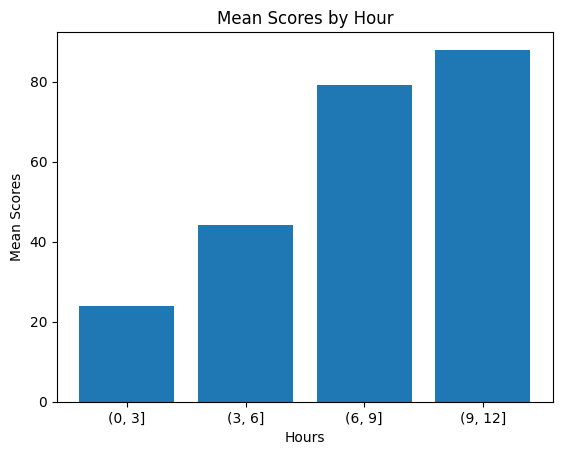

In [6]:
df = pd.DataFrame(data)

# define the bins for hours and scores
hour_bins = range(0, 25, 3)
score_bins = range(0, 101, 10)

# use pd.cut to assign the hours and scores to their respective bins
df['hour_bins'] = pd.cut(df['Hours'], bins=hour_bins)
df['score_bins'] = pd.cut(df['Scores'], bins=score_bins)

# groupby the bins and calculate the mean of the Scores column
mean_scores = df.groupby('hour_bins')['Scores'].mean()

# create a bar chart of the mean scores by hour bin
plt.bar(mean_scores.index.astype(str), mean_scores.values)

# add labels and title to the chart
plt.xlabel('Hours')
plt.ylabel('Mean Scores')
plt.title('Mean Scores by Hour')
plt.show()

<Axes: xlabel='Hours'>

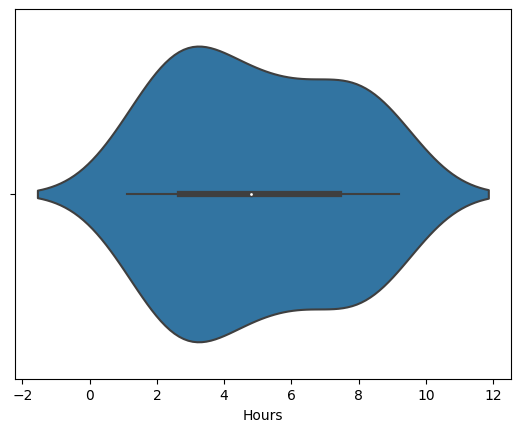

In [7]:
sns.violinplot(x=data['Hours'])

<Axes: xlabel='Scores'>

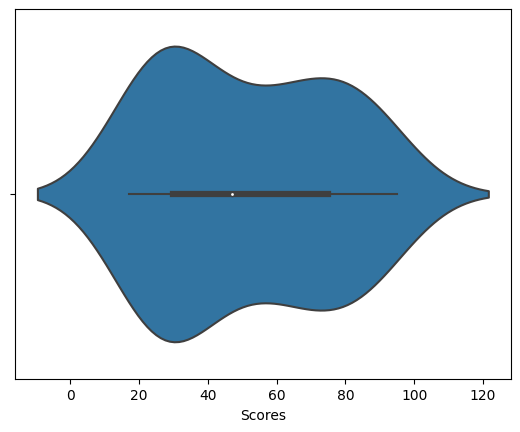

In [8]:
sns.violinplot(x=data['Scores'])

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

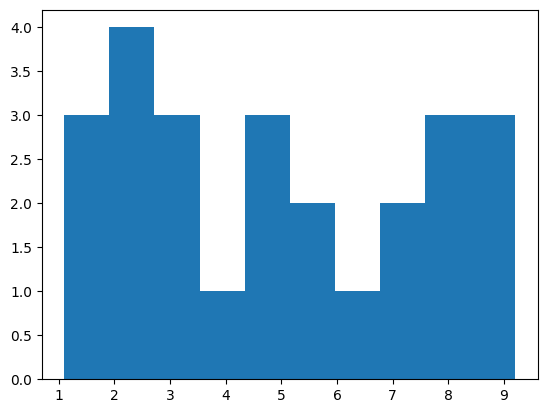

In [9]:
plt.hist(data['Hours'], bins=10)

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

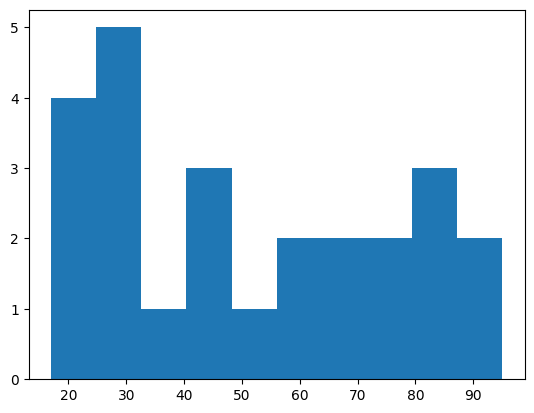

In [10]:
plt.hist(data['Scores'], bins=10)

<ipython-input-11-9045575258c9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Hours'], shade=True)


<Axes: xlabel='Hours', ylabel='Density'>

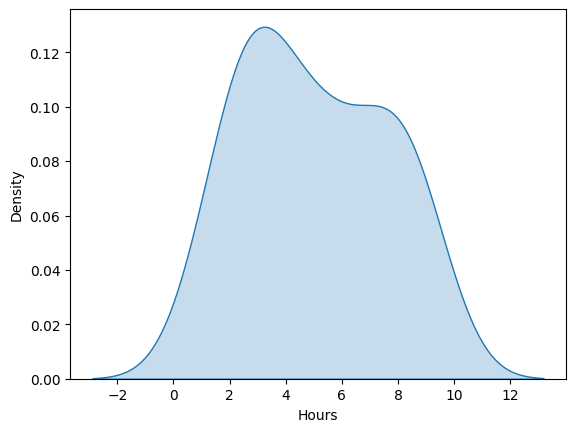

In [11]:
sns.kdeplot(data['Hours'], shade=True)

<ipython-input-12-ce613a89f360>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Scores'], shade=True)


<Axes: xlabel='Scores', ylabel='Density'>

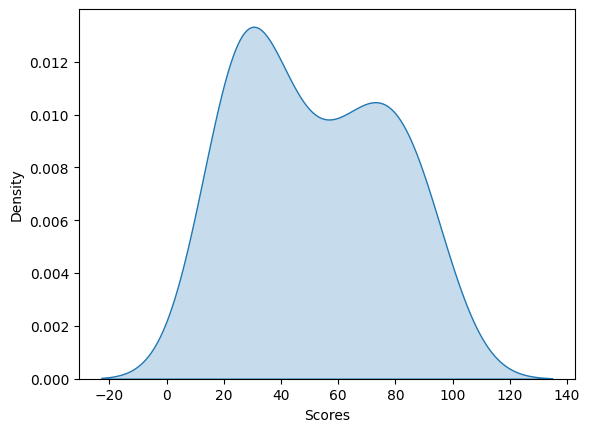

In [12]:
sns.kdeplot(data['Scores'], shade=True)

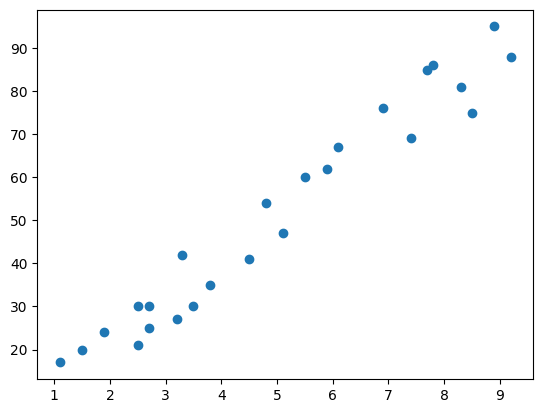

In [13]:
plt.scatter(x=data['Hours'], y=data['Scores'])

In [14]:
X = data['Hours']
X = np.array(X)
Y = data['Scores']
Y = np.array(Y)

In [15]:
class LinearRegression() :
  def __init__(self, iterations, learningRate) :
    self.iterations = iterations
    self.learningRate = learningRate

  def modelFit(self, X, y) :
    self.m = len(X)
    self.weights = 0
    self.c = 0 # bias
    self.X = X
    self.y = y

    for i in range(self.iterations) :
      self.gradientDecent()

    return self

  def gradientDecent(self) :
    y_pred = self.X * self.weights + self.c
    dcost = -(np.sum((self.X) * (self.y - y_pred))) / self.m
    dc = -np.sum(self.y - y_pred) / self.m
    self.weights = self.weights - self.learningRate * dcost / self.m
    self.c = self.c - self.learningRate * dc / self.m

  def predict(self, X) :
    return X * (self.weights) + self.c

    return self

In [70]:
model = LinearRegression(1000000, 0.5)
model.modelFit(X, Y)
pred = model.predict(9.25)
print("Predicted values ", pred)
print("Trained Weight ", model.weights)
print("Trained C ", model.c)

Predicted values  92.90985477015735
Trained Weight  9.775803390787488
Trained C  2.4836734053731018


In [71]:
print(X) # Testing data - In Hours
y_pred = model.predict(X) # Predicting the scores

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]


In [72]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y, 'Predicted': y_pred})
df

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [75]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(Y, y_pred))
print('R-2:', metrics.r2_score(Y, y_pred))

Mean Absolute Error: 4.972805319866381
R-2: 0.9529481969048356


# CONCLUSION
In conclusion, the supervised machine learning model has been successfully validated and executed, with a model fit score of 0.95, as indicated by the R-2 model. This confirms the accuracy of the predictions made using this approach.